# Data Workshop 1

**Instructor:** Tommy Stone, Applied Ocean Science (AOS) PhD student (thstone@ucsd.edu)
**TAs:** Austin Green (a7green@ucsd.edu)

This notebook is meant to be a general guide into data analysis with Python. This is meant to show a typical data analysis workflow for graduate students looking at a new dataset. We will apply concepts learned in this math workshop and demonstrate how they translate into everyday research. The topics include

1) Loading a new dataset
2) Determining the statistics and gradients
3) Visualizing the statistics as well as the variables

Author: Tommy Stone

Notes adapted from **Andrea Rodriguez-Marin Freudmann notebook from Data 1 2024** 

Dataset created by **Caeli Griffin, Kaley Mudd and Turner Johnson**

## 1 | Importing Libraries and Loading a NetCDF File


### 1.1 Importing Libraries

What some individuals like (and don't like) about python is it's library system. Below are some standard libraries that are used within oceanography and that we will use in this notebook

**Description of Libraries**

- **NumPy**: A fundamental package for scientific computing and linear algebra in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

- **xarray**: A library designed for working with labeled multi-dimensional arrays. It is particularly useful for handling datasets with dimensions like time, latitude, and longitude, often used in geosciences and often used for opening NetCDF (.net) 

- **matplotlib**: A comprehensive library for creating static, animated, and interactive visualizations in Python. It is widely used for plotting graphs and charts.

- **gsw**: The Gibbs SeaWater (GSW) Oceanographic Toolbox for Python. It is used for oceanographic calculations, such as determining seawater properties like salinity and density.

- **datetime**: A module in Python's standard library for working with dates and times. It provides classes for manipulating dates, times, and intervals.
  
- **cmocean**: A library of uniform colormaps designed specifically for oceanographic data. It provides colormaps that are visually appealing and scientifically accurate for representing data such as temperature, salinity, and density.

In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cmocean.cm as cm
import gsw

# converting ordinal to dattime
import datetime


### 1.2 Loading the data

We will be analyzing data collected from the Washington Shelf. File is located on our shared Google Drive, download the file in the same directory as this notebook and execute the following commands

[Download the dataset from Google Drive](https://drive.google.com/file/d/1LaD2vD9eag6EhWqv2sMMbanr_Ed6v9JM/view?usp=drive_link)

Xarray can be used to open the data 

```
xr.open_dataset('washington_sehfl_data.nc)
```

In [6]:
# load the dataset
data = xr.open_dataset("washington_shelf_data.nc")

# review the outputs
data

<xarray.Dataset> Size: 49kB
Dimensions:  (time: 19, depth: 105)
Coordinates:
  * time     (time) datetime64[ns] 152B 1900-01-09T13:04:54 ... 1900-01-09T13...
  * depth    (depth) float64 840B -3.0 -3.5 -4.0 -4.5 ... -54.0 -54.5 -55.0
Data variables:
    rho      (time, depth) float64 16kB ...
    sal      (time, depth) float64 16kB ...
    temp     (time, depth) float64 16kB ...
Attributes: (12/14)
    title:          OOI Washington Shelf Surface-Piercing Profiler CTD
    source:         CE02SHSP-SP001-08-CTDPFJ000-recovered_cspp-ctdpf_j_cspp_i...
    creation_date:  2024-09-09 19:32:12
    sourceUrl:      http://oceanobservatories.org/
    institution:    Ocean Observatories Initiative
    Manufacturer:   Sea-Bird Electronics
    ...             ...
    Description:    CTD Profiler: CTDPF Series J
    latitude:       44.6350
    longitude:      -124.3059
    Owner:          Oregon State University
    gridded by:     Turner Johnson
    for use in:     SIO Math Workshop 2024

## 2. | Statistics of the data

### 2.1 | Looking at the whole dataset

Pick a variable that interests from our options of density, salinity and temperature. In python we use the plt (plot) command from Matplotlib. To plot 2D colormaps we could use pcolormesh. Below are some options for python

- **plt.pcolormesh(x,y,data)**: creates a 2D colormap of data
- **plt.plot(x,y)**: Creates a 2D plot of y vs x. Can also use a c option to include color

---

**Exercise**

---


1) Plot a 2D colormap of time vs depth over our variable of interests. Below is an example of a 2D plot over density.

2) Play with other variables and use other colormaps from [cmocean](https://matplotlib.org/cmocean/)

```
cb0 = plt.pcolormesh(data['time'], data['depth'], data['rho'].T, cmap = cm.dense);
plt.colorbar(cb0, label = "Density (kg/m^3)");
plt.xlabel("Time");
plt.ylabel("Depth (m)");
plt.xticks(rotation = 45);
```

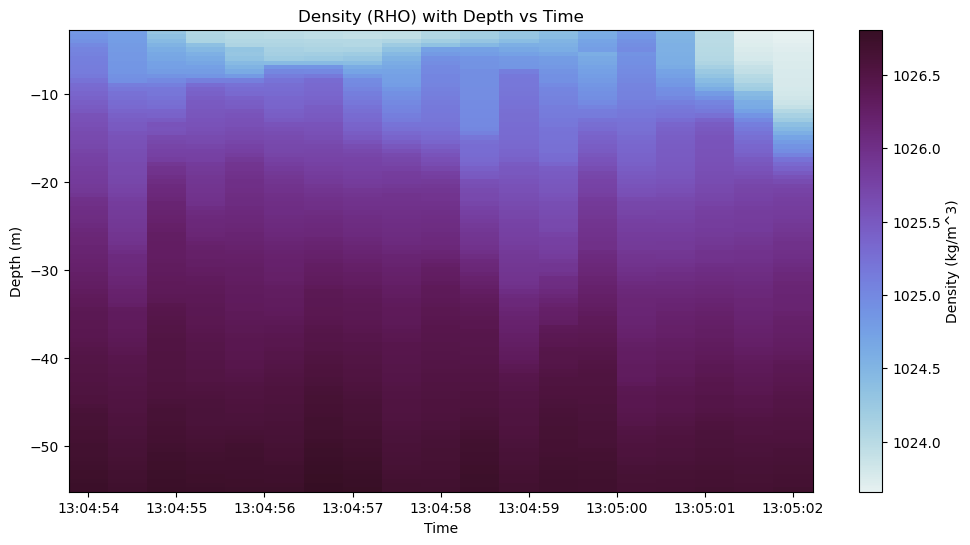

In [ ]:
# grab dimensions
M,N = data['rho'].shape

# Separating variables for easier access. Capital means a matrix and lower case means a vector
SAL = data['sal'].to_numpy()
TEMP = data['temp'].to_numpy()
depth = data['depth'].to_numpy()
time = data['time'].to_numpy()
RHO = data['rho'].to_numpy()

# Create a pcolormap of density with depth vs time
fig, ax = plt.subplots(figsize=(12, 6))
c = ax.pcolormesh(time, depth, RHO.T, shading='auto', cmap=cm.dense)
ax.set_title('Density (RHO) with Depth vs Time')
ax.set_xlabel('Time')
ax.set_ylabel('Depth (m)')
fig.colorbar(c, ax=ax, label='Density (kg/m^3)')
plt.show()



### 2.2 | Separating into meaningful chunks with statistics

We often times care about the mean of our variable of interests as well as the standard deviation. We can determine the values  by using the following commands

```
data['variable'].mean
data['variable'].std
```

---

**Exercise**

---

1) Compare the mean of your variable of interest over depth and plot the results
2) Compare the mean of your variable of interest over time and plot the results


---

**Question?**

---

What conclusions can you draw from the differences/similarities between the statistics of your variable when looking at different sets of time/depth? 


Maximum density: 1026.8088984693732
Minimum density: 1023.6581371622559


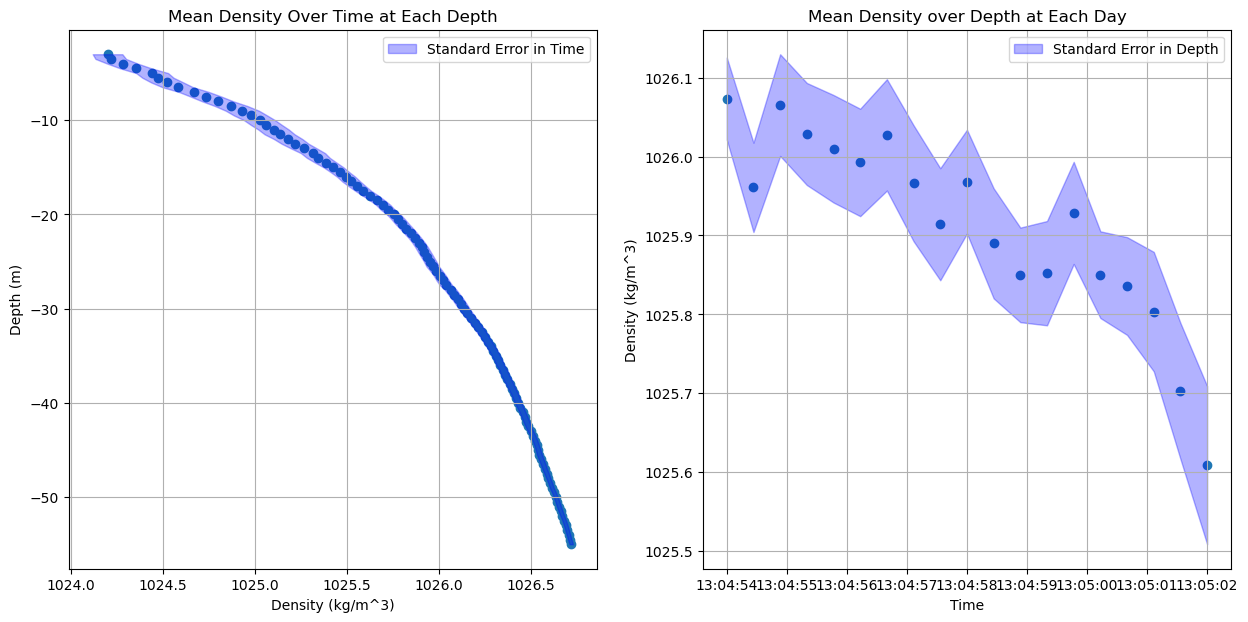

In [27]:
# There are a few ways to do this. It depends on what you are interested in. If you want to know the mean and standard deviation
# of your variable across all of time at various depths
mean_depth = RHO.mean(axis = 0)
std_depth = RHO.std(axis = 0)
max_rho = RHO.max()
min_rho = RHO.min()

mean_time = RHO.mean(axis = 1)
std_time = RHO.std(axis = 1)

# Compute the standard error for RHO
std_error_depth = std_depth / np.sqrt(M)
std_error_time = std_time / np.sqrt(N)

# plot the mean at each depth
fig, axs = plt.subplots(1,2, figsize = (15,7))
axs[0].scatter(mean_depth, data['depth'])
axs[0].fill_betweenx(data['depth'], mean_depth - std_error_depth, mean_depth + std_error_depth, alpha=0.3, color='blue', label='Standard Error in Time')
axs[0].legend()
axs[0].grid()
axs[0].set_title("Mean Density Over Time at Each Depth")
axs[0].set_xlabel("Density (kg/m^3)")
axs[0].set_ylabel("Depth (m)")

axs[1].scatter(data['time'], mean_time)
axs[1].fill_between(data['time'], mean_time - std_error_time, mean_time + std_error_time, alpha=0.3, color='blue', label='Standard Error in Depth')
axs[1].legend()
axs[1].grid()
axs[1].set_title("Mean Density over Depth at Each Day")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Density (kg/m^3)")

print("Maximum density: {}".format(max_rho))
print("Minimum density: {}".format(min_rho))



## 3. | Visualizing statistics

### 3.1 | One-dimensional histograms

Another way we like to visualize data and gain some intiution is by understanding the type of distribution the data follows (Gaussian, $\chi$ etc. etc.). 

There are a few ways to do this 

```
count, bin np.hist(data, bins = #, density = True)
plt.hist(data, bins = #, density = True)
```

---

**Exercise**

---

1) Plot a histogram of your variable over all depths/time, over just one depth, then over just a day or two

---

**Question?**

---

1) What can we learn from this plot? 
2) What do the differences between histograms imply? 
3) What further information about the data did we learn on top of the statistics? 

Text(0.5, 1.0, 'Histogram of Density over Time')

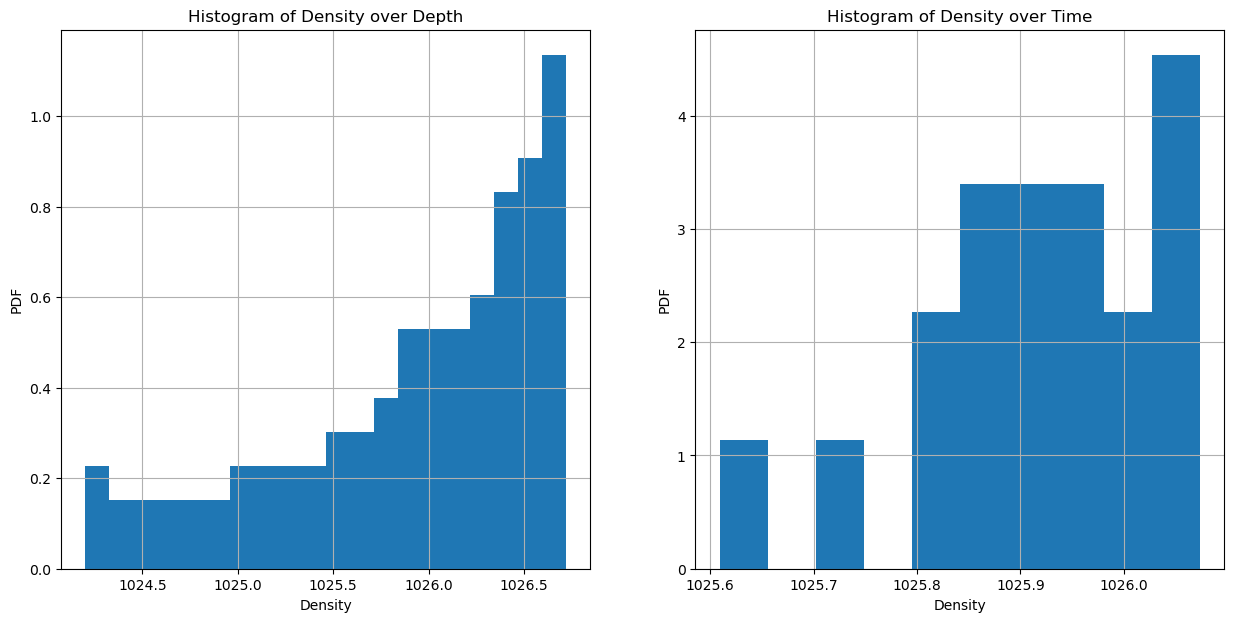

In [28]:
# Plotting histogram over depth
fig, axs = plt.subplots(1,2, figsize = (15,7))
axs[0].hist(mean_depth, bins = 20, density = True)
axs[0].grid()
axs[0].set_xlabel("Density")
axs[0].set_ylabel("PDF")
axs[0].set_title("Histogram of Density over Depth")

axs[1].hist(mean_time, bins = 10, density = True)
axs[1].grid()
axs[1].set_xlabel("Density")
axs[1].set_ylabel("PDF")
axs[1].set_title("Histogram of Density over Time")



### 3.2 | Two-dimensional histograms

What if we want to know about how two variables relate to one another? Well, we can visualize that too. 
Pick a second variable that you think might have a relationship with your first. Plot the 2D histogram of the two variables. You can do so for the whole record, per day, per depth, you can decide what is most relevant based on your hypothesis. 

```

plt.hist2d(variable1, variable2, density = True)

```

---

**Exercise**

---

Plot the 2D histogram of the two variables. You can do so for the whole record, per day, per depth, you can decide what is most relevant based on your hypothesis. 

---

**Question?**

---

1) Based on your plots, do you see any correlations?

Text(0.5, 1.0, '2D Histogram of Temperature and Density')

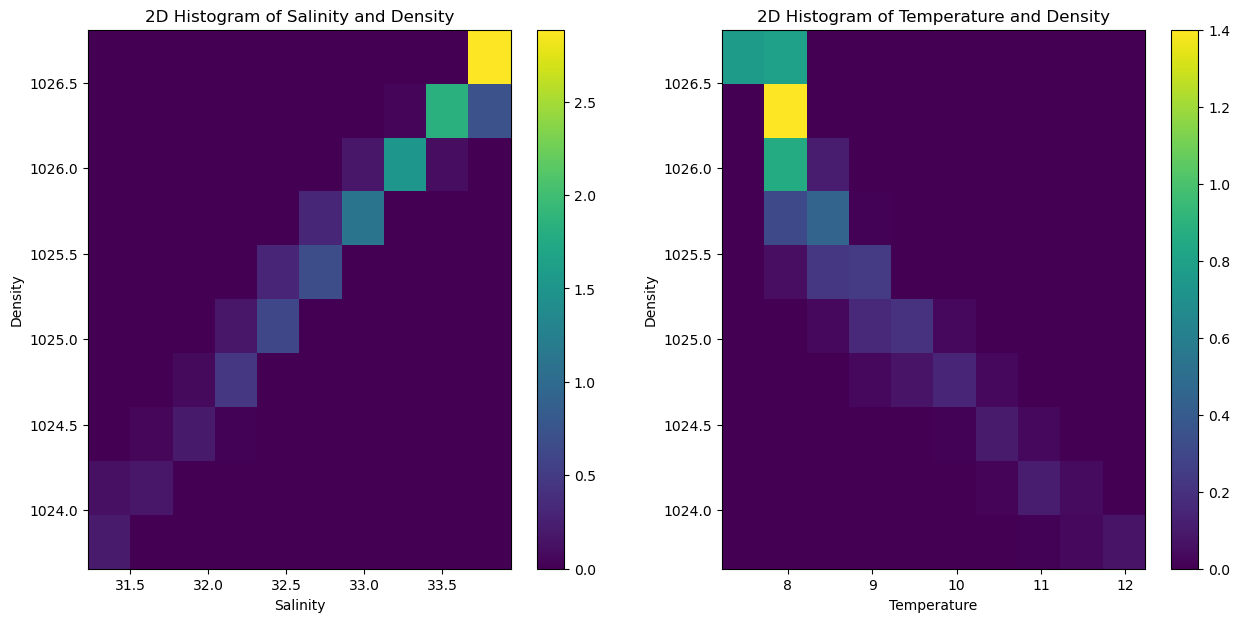

In [29]:
fig, axs = plt.subplots(1,2, figsize=(15,7))

hist0 = axs[0].hist2d(SAL.flatten(), RHO.flatten(), density = True)
fig.colorbar(hist0[3], ax=axs[0])
axs[0].set_xlabel('Salinity')
axs[0].set_ylabel('Density')
axs[0].set_title('2D Histogram of Salinity and Density')

hist1 = axs[1].hist2d(TEMP.flatten(), RHO.flatten(), density = True)
fig.colorbar(hist1[3], ax=axs[1])
axs[1].set_xlabel('Temperature')
axs[1].set_ylabel('Density')
axs[1].set_title('2D Histogram of Temperature and Density')

## 4. Plotting physical quantities from data

### 4.1 | Temperature-Salinity diagram with depth

A useful technique in oceanography is looking at the relationship between temperature and salinity, since they define density. Colder water is denser, as is saltier water, so there is an interplay between the two variables. You can analyze this relationship by plotting temperature vs salinity across density lines

```

```

---

**Exercise**

---

1. Create a scatter plot with temperature on the y-axis and salinity on the x-axis. Color your points by depth.
2. Add density contour lines: density is constant along each of these lines. 

---

**Questions?**

---


Interpret your plot: what is the overall change in density over depth? Does salinity or temperature seem to affect density more? Is this what you expected? Are there any points that stand out?




Text(0.5, 1.0, 'T-S Diagram')

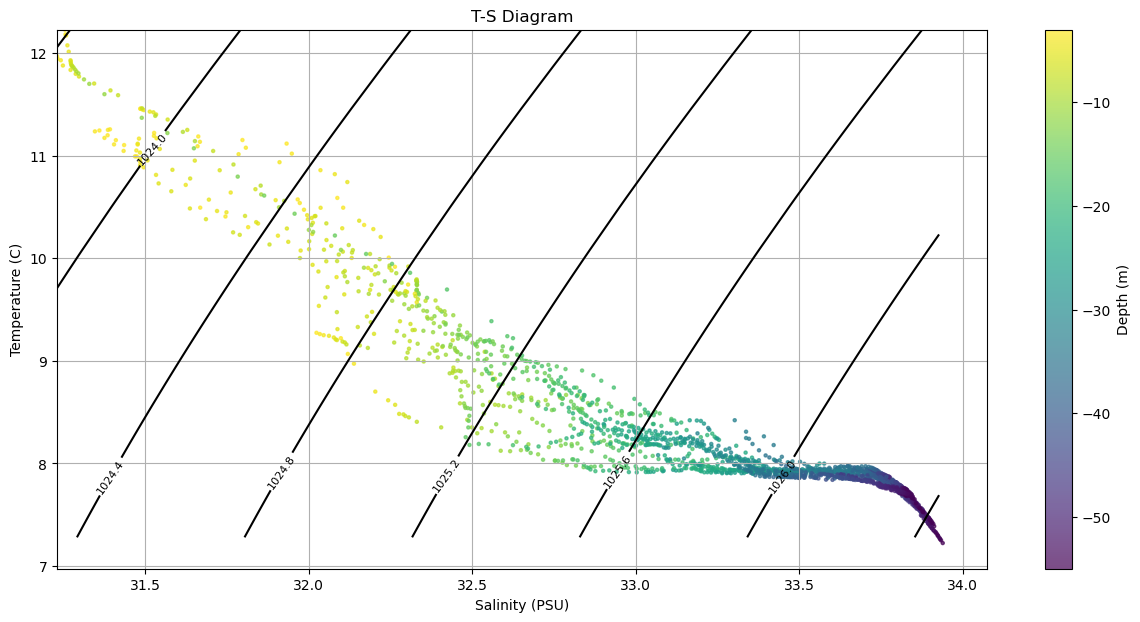

In [ ]:
# Creating meshgrid of values for time and depth for scatter plots
TIME, DEPTH = np.meshgrid(time,depth)

# order is because Matlab is column major and python is row major. 
sal = SAL.flatten(order = 'C')
temp = TEMP.flatten(order = 'C')
depth_flat = DEPTH.flatten(order = 'F')
time_flat = TIME.flatten(order = 'F')

# Slice salinity and temp data for contour points
slices = np.arange(0,N,10)
sal_slices = SAL[:,slices].flatten(order = 'C')
temp_slices = TEMP[:,slices].flatten(order = 'C')

# sorting the salinity and temperature values
sal_sorted = np.unique(sal_slices)
sal_sorted.sort()

temp_sorted = np.unique(temp_slices)
temp_sorted.sort()

# creating meshgrid
SAL_SORTED, TEMP_SORTED = np.meshgrid(sal_sorted, temp_sorted)

# providing contour plots density
RHOS = gsw.density.rho(SAL_SORTED, TEMP_SORTED, 10)


# Plotting T-S profiles
# Create subplots 1,2 
fig, axs = plt.subplots(1,1, figsize = (15,7))

# First subplot where colorbar is depth
contour0 = axs.contour(SAL_SORTED, TEMP_SORTED, RHOS, colors='black')
axs.clabel(contour0, inline=True, fontsize=8)
cb0 = axs.scatter(sal, temp, c=depth_flat, s=5, alpha=0.7)
axs.grid()
fig.colorbar(cb0, label = "Depth (m)")
axs.set_ylabel("Temperature (C)")
axs.set_xlabel("Salinity (PSU)")
axs.set_title("T-S Diagram")



## 5. calculating physical quantities from data

In a continuously stratified ocean, the buoyancy frequency represents the natural oscillation frequency of a displaced fluid parcel. A larger buoyancy frequency means a more stratified fluid. 

The equation for the buoyancy frequency is the following:

$$
N^2 = -\frac{g}{\rho_0} \frac{d \rho}{d z}
$$

where $g$ is acceleration due to gravity, z is depth, and $\rho$ is the density as a function of depth. To calculate derivatives we can use numpy 

```
np.diff(array, axis)
np.gradient(array, axis)
```

**np.diff** is used as a first order approximation and takes the difference along the chosen axis. **np.gradient** is a second order approximation (central finite difference) to approximate the gradient along a specific axis.

---

**Exercise**

---

1. Calculate the derivative $\frac{d \rho}{d z}$. Think about what this vertical gradient in density means. 
2. Calculate $N^2$

---

**Questions?**

---

1) How does $N^2$ change with the depth and time? How could you visualize these changes?




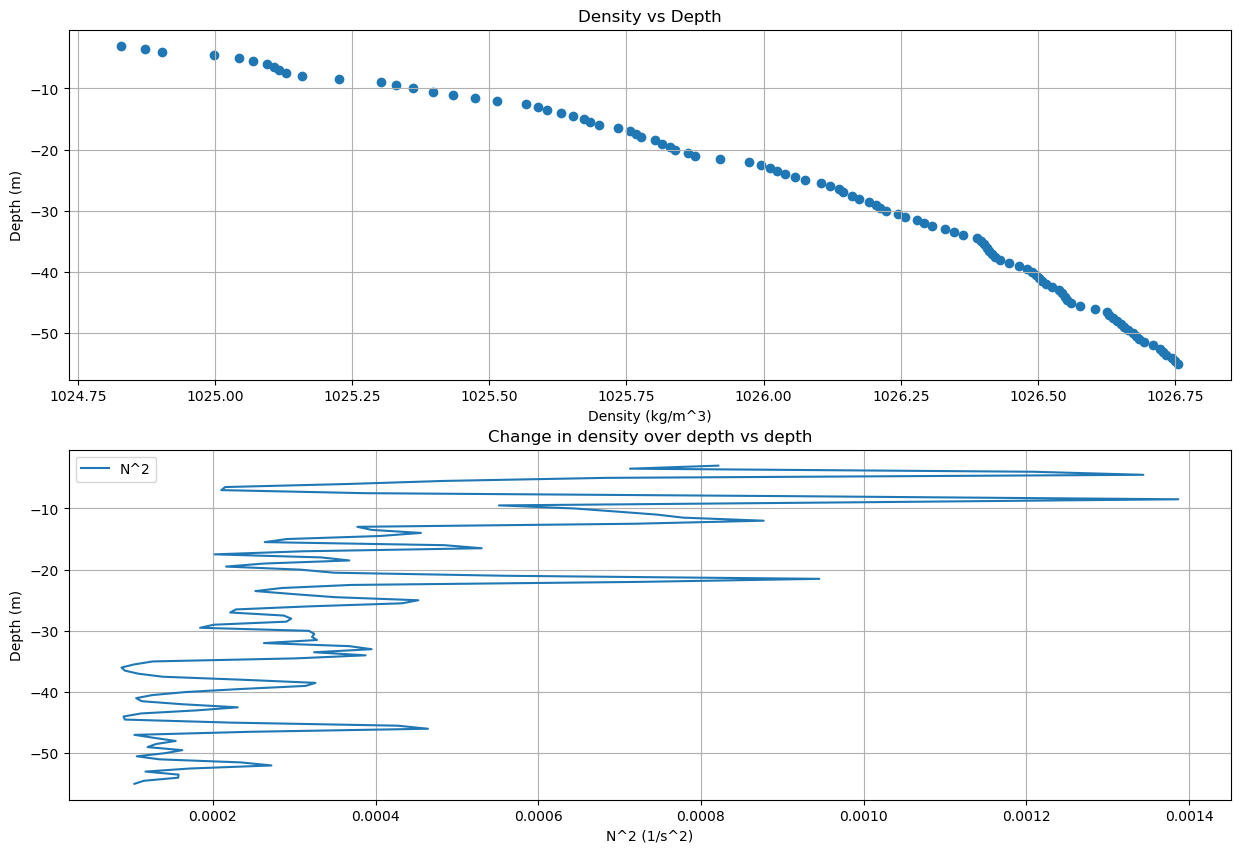

In [47]:
# determining the derivative as a function of depth by using numerical approximation
#drho = np.diff(RHO, axis = 1)
#dz = np.mean(np.diff(depth)) # because dz is constant we can use one value

# creating gradient
#drho_dz = drho/dz

# calculating using higher order method
# Using gradient functino
drho_dz_grad = np.gradient(RHO, depth, axis=1)

# plotting gradient on first day
fig, axs = plt.subplots(2,1, figsize = (15,10))
axs[0].scatter(RHO[0,:],depth)
axs[0].grid()
axs[0].set_ylabel("Depth (m)")
axs[0].set_xlabel("Density (kg/m^3)")
axs[0].set_title("Density vs Depth")

# calculate N as a function of depth
g = 9.81 # m/s^2
rho0 = 1025 # kg/m^3
N2 = -g/rho0 * drho_dz_grad

# Plot N2 as a function of depth
axs[1].plot(N2[0, :], depth, label="N^2")
axs[1].grid()
axs[1].set_ylabel("Depth (m)")
axs[1].set_xlabel("N^2 (1/s^2)")
axs[1].set_title("Change in density over depth vs depth")
axs[1].legend()